In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
train = pd.read_csv("/content/Train-1542865627584.csv")
print("Shape of data: ", train.shape)
train.head()

Shape of data:  (5410, 2)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


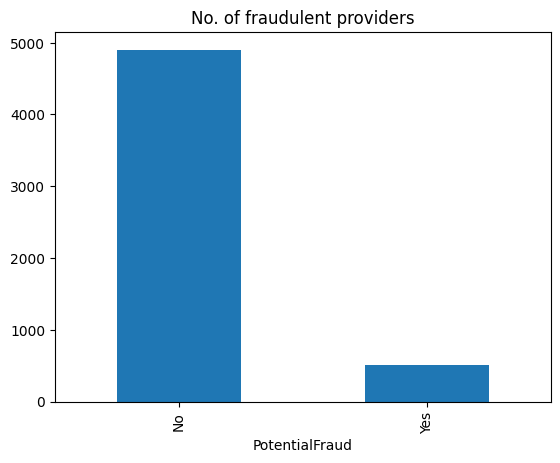

Total no. of providers in train data:  5410
No. of fraudulent providers: 506, which is 9.353049907578558 % of data
No. of non fraudulent providers: 4904, which is 90.64695009242143 % of data


In [6]:
train.groupby("PotentialFraud")['Provider'].count().plot.bar()
plt.title('No. of fraudulent providers')
plt.show()

fraud_cnt = len(train[train.PotentialFraud == 'Yes'])
print("Total no. of providers in train data: ", len(train))
print("No. of fraudulent providers: {}, which is {} % of data".format(fraud_cnt, fraud_cnt/len(train)*100))
print("No. of non fraudulent providers: {}, which is {} % of data".format(len(train)-fraud_cnt, (1-(fraud_cnt/len(train)))*100))

In [7]:
test = pd.read_csv("/content/Test-1542969243754.csv")
print("Shape of data: ", test.shape)
test.head()

Shape of data:  (1353, 1)


,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


In [9]:
train_beneficiary = pd.read_csv("/content/Train_Beneficiarydata-1542865627584.csv")
print("Shape of data: ", train_beneficiary.shape)
train_beneficiary.head()

Shape of data:  (138556, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [10]:
train_beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [11]:
train_beneficiary.isna().sum()

,0
BeneID,0
DOB,0
DOD,137135
Gender,0
Race,0
RenalDiseaseIndicator,0
State,0
County,0
NoOfMonths_PartACov,0
NoOfMonths_PartBCov,0


In [12]:
train_beneficiary.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,1.762847,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,0.425339,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [13]:
test_beneficiary = pd.read_csv("/content/Test_Beneficiarydata-1542969243754.csv")
print("Shape of data: ", test_beneficiary.shape)
test_beneficiary.head()

Shape of data:  (63968, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,1,1,2,2,2,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,2,1,2,1,1,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100


In [14]:
test_beneficiary.isna().sum()

,0
BeneID,0
DOB,0
DOD,63394
Gender,0
Race,0
RenalDiseaseIndicator,0
State,0
County,0
NoOfMonths_PartACov,0
NoOfMonths_PartBCov,0


In [15]:
train_inpatient = pd.read_csv("/content/Train_Inpatientdata-1542865627584.csv")
print("Shape of data: ", train_inpatient.shape)
train_inpatient.head()

Shape of data:  (40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [16]:
train_inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [17]:
train_inpatient.isna().sum()

,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0
InscClaimAmtReimbursed,0
AttendingPhysician,112
OperatingPhysician,16644
OtherPhysician,35784
AdmissionDt,0


In [18]:
train_inpatient.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [19]:
test_inpatient = pd.read_csv("/content/Test_Inpatientdata-1542969243754.csv")
print("Shape of data: ", test_inpatient.shape)
test_inpatient.head()

Shape of data:  (9551, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,5789,1068.0,2009-09-16,332,5780,5533,496,V420,40390,2851,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,5939,1068.0,2009-01-08,661,1889,41071,5990,5601,4588,5845,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,4019,1068.0,2009-12-13,241,4010,78791,60000,41401,V1254,4372,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,8208,1068.0,2009-07-06,564,8208,4168,920,5990,40391,2859,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,4279,1068.0,2009-01-31,880,29654,V142,78702,30503,V140,V4582,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
test_inpatient.isna().sum()

,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0
InscClaimAmtReimbursed,0
AttendingPhysician,31
OperatingPhysician,3962
OtherPhysician,8538
AdmissionDt,0


In [22]:
train_outpatient = pd.read_csv("/content/Train_Outpatientdata-1542865627584.csv")
print("Shape of data: ", train_outpatient.shape)
train_outpatient.head()

Shape of data:  (386397, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947


In [23]:
train_outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [24]:
train_outpatient.isna().sum()

,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0
InscClaimAmtReimbursed,0
AttendingPhysician,1049
OperatingPhysician,318925
OtherPhysician,241098
ClmDiagnosisCode_1,7799


In [25]:
train_outpatient.describe()

,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid
count,386397.000000,112.000000,23.000000,2.00000,1.0,0.0,0.0,386396.000000
mean,285.553589,6407.875000,4782.304348,2406.50000,7840.0,NaN,NaN,2.796121
std,690.611434,3222.060068,2366.474698,2820.64895,NaN,NaN,NaN,15.829021
min,0.000000,51.000000,496.000000,412.00000,7840.0,NaN,NaN,0.000000
25%,40.000000,3894.500000,2747.000000,1409.25000,7840.0,NaN,NaN,0.000000
50%,80.000000,7395.000000,4142.000000,2406.50000,7840.0,NaN,NaN,0.000000
75%,200.000000,9672.000000,6389.000000,3403.75000,7840.0,NaN,NaN,0.000000
max,102500.000000,9999.000000,9982.000000,4401.00000,7840.0,NaN,NaN,897.000000


In [26]:
test_outpatient = pd.read_csv("/content/Test_Outpatientdata-1542969243754.csv")
print("Shape of data: ", test_outpatient.shape)
test_outpatient.head()

Shape of data:  (125841, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,V5861,2724,3182,V5869,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,E9174,4019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [27]:
test_outpatient.isna().sum()

,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0
InscClaimAmtReimbursed,0
AttendingPhysician,316
OperatingPhysician,104237
OtherPhysician,78222
ClmDiagnosisCode_1,2578


In [28]:
def combine_data(provider, beneficiary, inpatient, outpatient):
    ''' This function combines provider, beneficiary, inpatient and outpatient data
        together in a single file. '''
    # Finding common columns in inpatient data and outpatient data
    common_inp_outp = [col for col in inpatient if col in outpatient]
    # Outer joining inpatient data and outpatient data using common columns
    train_in_out = outpatient.merge(inpatient, on=common_inp_outp, how='outer', indicator='is_inpatient')
    train_in_out = train_in_out.replace({'left_only':0, 'right_only':1})
    # Inner joining beneficary data and combination of inpatient and outpatient
    train_benef_in_out = beneficiary.merge(train_in_out, on='BeneID')
    # Combining all combinations with train data containing target variable
    combined_data = provider.merge(train_benef_in_out, on='Provider')
    return combined_data

In [29]:
# Combine all data from training set
train_data = combine_data(train, train_beneficiary, train_inpatient, train_outpatient)
print("Shape of data: ", train_data.shape)
train_data.head()

/tmp/ipython-input-4039861146.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  train_in_out = train_in_out.replace({'left_only':0, 'right_only':1})


Shape of data:  (426871, 56)


,Provider,PotentialFraud,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,is_inpatient
0,PRV51001,No,BENE11727,1930-05-01,NaN,1,1,Y,1,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,5953,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0
1,PRV51001,No,BENE24646,1943-03-01,NaN,1,1,0,1,440,12,12,1,2,2,2,2,2,1,1,1,2,1,0,0,720,10,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,78650,51889,V5869,4019,V4581,49320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0
2,PRV51001,No,BENE31617,1933-08-01,NaN,2,1,0,1,660,12,12,2,2,1,2,2,2,1,1,2,1,2,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,V446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,59970,NaN,NaN,NaN,0
3,PRV51001,No,BENE32715,1936-03-01,NaN,1,1,0,1,410,12,12,1,1,1,1,1,1,1,1,2,2,2,2020,1068,6700,2700,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,78964,V442,5589,2720,33829,25002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,78902,NaN,NaN,NaN,0
4,PRV51001,No,BENE36012,1940-07-01,NaN,1,1,0,1,510,12,12,2,1,1,2,2,1,1,1,2,2,1,36000,1068,3520,140,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,29650,2971,3051,V1254,07070,28260,7823,49300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,29623,2009-07-04,2009-07-08,882,1


In [30]:
train_data.isna().sum()

,0
Provider,0
PotentialFraud,0
BeneID,0
DOB,0
DOD,423655
Gender,0
Race,0
RenalDiseaseIndicator,0
State,0
County,0


In [31]:
train_data.dtypes

,0
Provider,object
PotentialFraud,object
BeneID,object
DOB,object
DOD,object
Gender,int64
Race,int64
RenalDiseaseIndicator,object
State,int64
County,int64


In [32]:
train_data['PotentialFraud'] = train_data['PotentialFraud'].replace({'Yes':1, 'No':0})
train_data.PotentialFraud.value_counts()

/tmp/ipython-input-1719718020.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['PotentialFraud'] = train_data['PotentialFraud'].replace({'Yes':1, 'No':0})


,count
PotentialFraud,
0,261429
1,165442


In [33]:
train_data['DOB'] = pd.to_datetime(train_data['DOB'])
train_data['DOD'] = pd.to_datetime(train_data['DOD'])
train_data.head()

,Provider,PotentialFraud,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,is_inpatient
0,PRV51001,0,BENE11727,1930-05-01,NaT,1,1,Y,1,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,5953,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0
1,PRV51001,0,BENE24646,1943-03-01,NaT,1,1,0,1,440,12,12,1,2,2,2,2,2,1,1,1,2,1,0,0,720,10,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,78650,51889,V5869,4019,V4581,49320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0
2,PRV51001,0,BENE31617,1933-08-01,NaT,2,1,0,1,660,12,12,2,2,1,2,2,2,1,1,2,1,2,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,V446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,59970,NaN,NaN,NaN,0
3,PRV51001,0,BENE32715,1936-03-01,NaT,1,1,0,1,410,12,12,1,1,1,1,1,1,1,1,2,2,2,2020,1068,6700,2700,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,78964,V442,5589,2720,33829,25002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,78902,NaN,NaN,NaN,0
4,PRV51001,0,BENE36012,1940-07-01,NaT,1,1,0,1,510,12,12,2,1,1,2,2,1,1,1,2,2,1,36000,1068,3520,140,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,29650,2971,3051,V1254,07070,28260,7823,49300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,29623,2009-07-04,2009-07-08,882,1


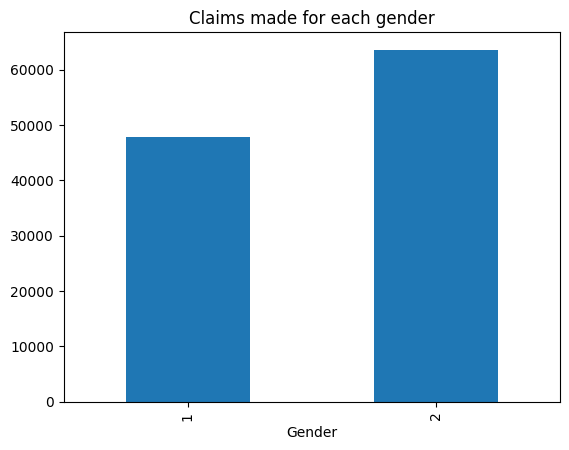

In [34]:
train_data.groupby('Gender')['BeneID'].nunique().plot.bar()
plt.title("Claims made for each gender")
plt.show()

In [35]:
train_data['Gender'] = train_data['Gender'].replace({1:'Female', 2:'Male'})
train_data.head()

,Provider,PotentialFraud,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,is_inpatient
0,PRV51001,0,BENE11727,1930-05-01,NaT,Female,1,Y,1,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,5953,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0
1,PRV51001,0,BENE24646,1943-03-01,NaT,Female,1,0,1,440,12,12,1,2,2,2,2,2,1,1,1,2,1,0,0,720,10,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,78650,51889,V5869,4019,V4581,49320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0
2,PRV51001,0,BENE31617,1933-08-01,NaT,Male,1,0,1,660,12,12,2,2,1,2,2,2,1,1,2,1,2,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,V446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,59970,NaN,NaN,NaN,0
3,PRV51001,0,BENE32715,1936-03-01,NaT,Female,1,0,1,410,12,12,1,1,1,1,1,1,1,1,2,2,2,2020,1068,6700,2700,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,78964,V442,5589,2720,33829,25002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,78902,NaN,NaN,NaN,0
4,PRV51001,0,BENE36012,1940-07-01,NaT,Female,1,0,1,510,12,12,2,1,1,2,2,1,1,1,2,2,1,36000,1068,3520,140,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,29650,2971,3051,V1254,07070,28260,7823,49300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,29623,2009-07-04,2009-07-08,882,1


In [36]:
train_data.RenalDiseaseIndicator.replace({'0':0, 'Y':1}, inplace=True)
train_data.head()

/tmp/ipython-input-2262479817.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data.RenalDiseaseIndicator.replace({'0':0, 'Y':1}, inplace=True)
/tmp/ipython-input-2262479817.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.RenalDiseaseIndicator.replace({'0':0, 'Y':1}, inplace=

,Provider,PotentialFraud,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,is_inpatient
0,PRV51001,0,BENE11727,1930-05-01,NaT,Female,1,1,1,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,5953,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0
1,PRV51001,0,BENE24646,1943-03-01,NaT,Female,1,0,1,440,12,12,1,2,2,2,2,2,1,1,1,2,1,0,0,720,10,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,78650,51889,V5869,4019,V4581,49320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0
2,PRV51001,0,BENE31617,1933-08-01,NaT,Male,1,0,1,660,12,12,2,2,1,2,2,2,1,1,2,1,2,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,V446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,59970,NaN,NaN,NaN,0
3,PRV51001,0,BENE32715,1936-03-01,NaT,Female,1,0,1,410,12,12,1,1,1,1,1,1,1,1,2,2,2,2020,1068,6700,2700,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,78964,V442,5589,2720,33829,25002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,78902,NaN,NaN,NaN,0
4,PRV51001,0,BENE36012,1940-07-01,NaT,Female,1,0,1,510,12,12,2,1,1,2,2,1,1,1,2,2,1,36000,1068,3520,140,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,29650,2971,3051,V1254,07070,28260,7823,49300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,29623,2009-07-04,2009-07-08,882,1


In [37]:
train_data.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0, inplace=True)
train_data.iloc[:, 12:22].head(10)

,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis
0,1,1,1,1,0,0,1,1,0,0
1,1,0,0,0,0,0,1,1,1,0
2,0,0,1,0,0,0,1,1,0,1
3,1,1,1,1,1,1,1,1,0,0
4,0,1,1,0,0,1,1,1,0,0
5,0,0,1,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,1,1,0
7,0,1,1,0,0,0,0,0,1,0
8,1,1,1,0,1,0,1,1,0,0
9,0,1,1,0,1,1,1,1,0,0


In [38]:
train_data['ClaimStartDt'] = pd.to_datetime(train_data['ClaimStartDt'])
train_data['ClaimEndDt'] = pd.to_datetime(train_data['ClaimEndDt'])

In [39]:
train_data['AdmissionDt'] = pd.to_datetime(train_data['AdmissionDt'])
train_data['DischargeDt'] = pd.to_datetime(train_data['DischargeDt'])

In [40]:
train_data.columns

Index(['Provider', 'PotentialFraud', 'BeneID', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'ClaimID',
       'ClaimStartDt', 'ClaimEndDt', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
  

In [41]:
dod_year = train_data['DOD'].dt.year
dod_year[pd.notnull(dod_year)].value_counts()

,count
DOD,
2009.0,3216


In [42]:
start_year = train_data['ClaimStartDt'].dt.year
print("Frequency of year from ClaimStartDt column: ")
print(start_year[pd.notnull(start_year)].value_counts())
print()
# Extract year from all non-null values in ClaimEndDt
end_year = train_data['ClaimEndDt'].dt.year
print("Frequency of year from ClaimEndDt column: ")
print(end_year[pd.notnull(end_year)].value_counts())

Frequency of year from ClaimStartDt column: 
ClaimStartDt
2009    424652
2008      2219
Name: count, dtype: int64

Frequency of year from ClaimEndDt column: 
ClaimEndDt
2009    426870
2008         1
Name: count, dtype: int64


In [43]:
train_data['Age'] = 2009 - train_data['DOB'].dt.year
train_data['Age'].head()

,Age
0,79
1,66
2,76
3,73
4,69


In [44]:
train_data['is_dead'] = train_data['DOD'].apply(lambda x: 0 if pd.isnull(x) else 1)
train_data['is_dead'].value_counts()

,count
is_dead,
0,423655
1,3216


In [ ]:
train_data['Days_Admitted'] = (train_data['DischargeDt'] - train_data['AdmissionDt']).fillna(pd.Timedelta('0 days'))
train_data['Days_Admitted'] = train_data['Days_Admitted'].apply(lambda x: int(str(x).split()[0]))
train_data['Days_Admitted'][train_data.is_inpatient == 1]

In [46]:
cols = ['ChronicCond_Alzheimer','ChronicCond_Heartfailure',
        'ChronicCond_KidneyDisease','ChronicCond_Cancer',
        'ChronicCond_ObstrPulmonary','ChronicCond_Depression',
        'ChronicCond_Diabetes','ChronicCond_IschemicHeart',
        'ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke']

train_data['Diseases_Count'] = train_data[cols].sum(axis=1)
train_data[cols+['Diseases_Count']].head()

,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Diseases_Count
0,1,1,1,1,0,0,1,1,0,0,0,6
1,1,0,0,0,0,0,1,1,1,0,1,5
2,0,0,1,0,0,0,1,1,0,1,0,4
3,1,1,1,1,1,1,1,1,0,0,0,8
4,0,1,1,0,0,1,1,1,0,0,1,6


In [47]:
train_data['Total_Physicians'] = train_data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']]\
                                            .apply(lambda x: sum(pd.notnull(x)), axis=1)
train_data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician','Total_Physicians']].head()

,AttendingPhysician,OperatingPhysician,OtherPhysician,Total_Physicians
0,PHY383007,NaN,PHY383007,2
1,PHY405682,NaN,PHY402512,2
2,PHY345302,NaN,NaN,1
3,PHY318842,PHY392882,NaN,2
4,PHY340163,NaN,NaN,1


In [48]:
cols = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10']
train_data['Total_ClaimCodes'] = train_data[cols].apply(lambda x: sum(pd.notnull(x)), axis=1)
train_data[cols+['Total_ClaimCodes']].head()

,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,Total_ClaimCodes
0,5953,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,78650,51889,V5869,4019,V4581,49320,NaN,NaN,NaN,NaN,6
2,V446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,78964,V442,5589,2720,33829,25002,NaN,NaN,NaN,NaN,6
4,29650,2971,3051,V1254,07070,28260,7823,49300,NaN,NaN,8


In [49]:
cols = ['ClmProcedureCode_1', 'ClmProcedureCode_2','ClmProcedureCode_3',
        'ClmProcedureCode_4', 'ClmProcedureCode_5','ClmProcedureCode_6']
train_data['Total_ProcedureCodes'] = train_data[cols].apply(lambda x: sum(pd.notnull(x)), axis=1)
train_data[cols+['Total_ProcedureCodes']].head()

,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Total_ProcedureCodes
0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,0


In [50]:
train_data['Claim_Period'] = (train_data['ClaimEndDt'] - train_data['ClaimStartDt']).fillna(pd.Timedelta('0 days'))
train_data['Claim_Period'] = train_data['Claim_Period'].apply(lambda x: int(str(x).split()[0]))
train_data[['ClaimStartDt', 'ClaimEndDt', 'Claim_Period']].head()

,ClaimStartDt,ClaimEndDt,Claim_Period
0,2009-12-17,2009-12-17,0
1,2009-05-22,2009-05-23,1
2,2009-12-28,2009-12-28,0
3,2009-03-29,2009-03-30,1
4,2009-07-04,2009-07-08,4


In [51]:
(train_data.Claim_Period > train_data.Days_Admitted).value_counts()

,count
False,378895
True,47976


In [52]:
train_data['ClaimPeriod_greater_DaysAdmitted'] = (train_data.Claim_Period > train_data.Days_Admitted)\
                                                  .replace({True:1, False:0})
train_data['ClaimPeriod_greater_DaysAdmitted'].value_counts()

/tmp/ipython-input-1609070212.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({True:1, False:0})


,count
ClaimPeriod_greater_DaysAdmitted,
0,378895
1,47976


In [53]:
train_data['is_claimcode'] = train_data['ClmAdmitDiagnosisCode'].apply(lambda x: 0 if pd.isnull(x) else 1)
train_data['is_claimcode'].value_counts()

,count
is_claimcode,
0,307556
1,119315


In [54]:
train_data['is_groupcode'] = train_data['DiagnosisGroupCode'].apply(lambda x: 0 if pd.isnull(x) else 1)
train_data['is_groupcode'].value_counts()

,count
is_groupcode,
0,386397
1,40474


In [55]:
train_data['is_deductible'] = train_data['DeductibleAmtPaid'].apply(lambda x: 0 if pd.isnull(x) else 1)
train_data['is_deductible'].value_counts()

,count
is_deductible,
1,425971
0,900


In [56]:
train_data['DeductibleAmtPaid'] = train_data['DeductibleAmtPaid'].fillna(0)
train_data['DeductibleAmtPaid'].isna().sum()

np.int64(0)

In [57]:
train_data.to_csv('/content/PreProcessed.csv', index=False)